## Nama : Wilson Boyaron Hutagalung
## Nim  : 2209106035
## Link Dataset : https://www.kaggle.com/datasets/samuelcortinhas/cats-and-dogs-image-classification

## Import Library

In [452]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

## Read Dataset dan Melakukan Split Dataset menjadi Train,Val,Test

In [453]:
img_path = './Cats_and_Dog/train'
img_path2 = './Cats_and_Dog/test'


train_datagen = ImageDataGenerator(
    rescale = 1./255,
    fill_mode = 'nearest',
    validation_split =0.2
)


In [454]:
train_generator = train_datagen.flow_from_directory(
    img_path,
    target_size = (150,150),
    batch_size=32,
    class_mode = 'binary',
    shuffle=True,
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    img_path,
    target_size = (150,150),
    batch_size=32,
    class_mode = 'binary',
    shuffle=False,
    subset='validation'
)

test_generator = train_datagen.flow_from_directory(
    img_path2,
    target_size = (150,150),
    batch_size=32,
    class_mode = 'binary',
)


Found 447 images belonging to 2 classes.
Found 110 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


## Menampilkan nama Kelas yang ada pada Dataset

In [455]:
class_names = list(train_generator.class_indices.keys())
class_names

['cats', 'dogs']

## Menampilkan batch gambar pada train generator

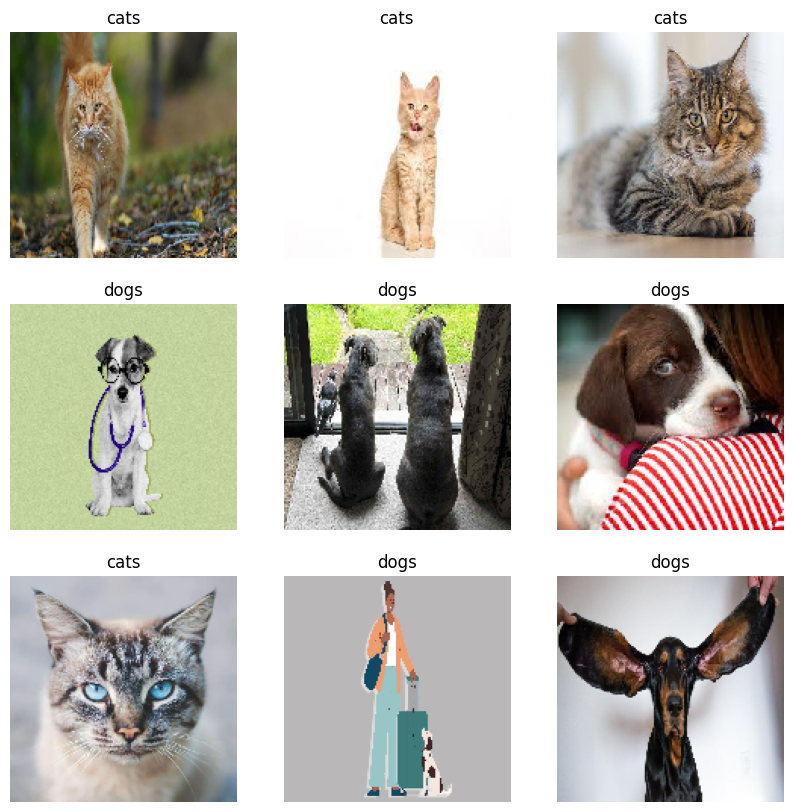

In [456]:
plt.figure(figsize=(10, 10))
for images, labels in train_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[int(labels[i])])
        plt.axis("off")
    break
plt.show()

## Modelling
## Membuat Model Sequential

In [457]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

In [458]:
model.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_152 (Conv2D)         (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_152 (MaxPool  (None, 74, 74, 32)        0         
 ing2D)                                                          
                                                                 
 conv2d_153 (Conv2D)         (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_153 (MaxPool  (None, 36, 36, 64)        0         
 ing2D)                                                          
                                                                 
 conv2d_154 (Conv2D)         (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_154 (MaxPool  (None, 17, 17, 128)     

## Melakukuan Model Compile

In [459]:
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.optimizers.Adam(),
    metrics=['accuracy'],
)

## Proses Training menggunakan fungsi Callback

In [460]:
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    verbose=1,
    callbacks=[early_stop]
)

Epoch 1/20
14/14 [==============================] - 8s 559ms/step - loss: 0.7245 - accuracy: 0.5145 - val_loss: 0.6913 - val_accuracy: 0.5000
Epoch 2/20
14/14 [==============================] - 7s 514ms/step - loss: 0.6945 - accuracy: 0.4743 - val_loss: 0.6923 - val_accuracy: 0.5000
Epoch 3/20
14/14 [==============================] - 7s 513ms/step - loss: 0.6921 - accuracy: 0.5145 - val_loss: 0.6890 - val_accuracy: 0.5091
Epoch 4/20
14/14 [==============================] - 7s 497ms/step - loss: 0.6905 - accuracy: 0.5011 - val_loss: 0.6891 - val_accuracy: 0.5182
Epoch 5/20
14/14 [==============================] - 7s 487ms/step - loss: 0.6861 - accuracy: 0.5660 - val_loss: 0.6950 - val_accuracy: 0.5000
Epoch 6/20
14/14 [==============================] - 7s 488ms/step - loss: 0.6916 - accuracy: 0.5660 - val_loss: 0.6786 - val_accuracy: 0.6273
Epoch 7/20
14/14 [==============================] - 7s 515ms/step - loss: 0.6688 - accuracy: 0.5996 - val_loss: 0.6682 - val_accuracy: 0.5818
Epoch 

## Evaluasi Model

In [461]:
model.evaluate(validation_generator)

4/4 [==============================] - 1s 163ms/step - loss: 0.6914 - accuracy: 0.7273


[0.6913719773292542, 0.7272727489471436]

In [462]:
from sklearn.metrics import classification_report

y_pred = model.predict(validation_generator)
y_pred = np.where(y_pred > 0.5,1,0)

print(classification_report(validation_generator.classes, y_pred))

4/4 [==============================] - 1s 153ms/step
              precision    recall  f1-score   support

           0       0.74      0.71      0.72        55
           1       0.72      0.75      0.73        55

    accuracy                           0.73       110
   macro avg       0.73      0.73      0.73       110
weighted avg       0.73      0.73      0.73       110



## Grafik pergerakan metrik akurasi dan loss pada training maupun validation*

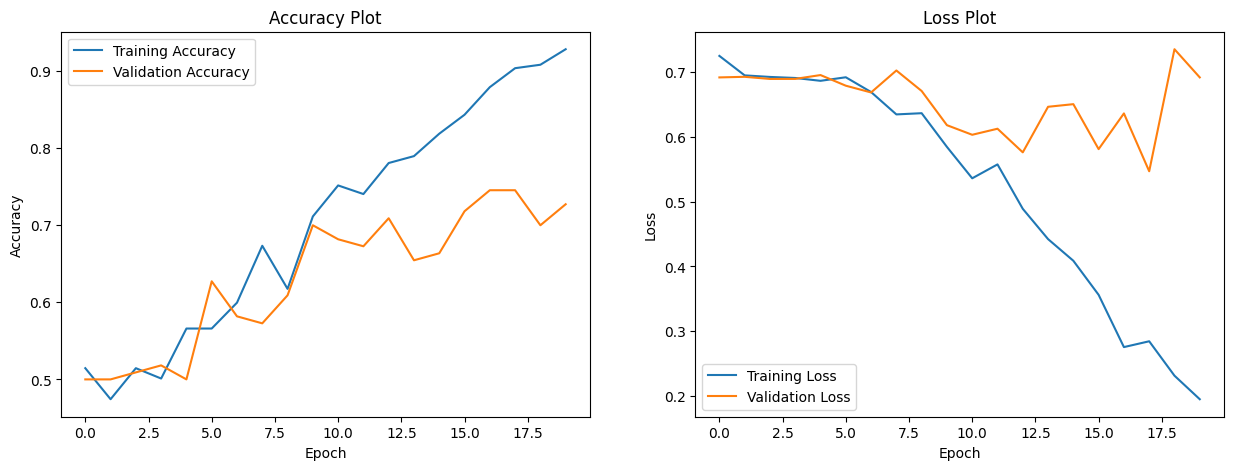

In [463]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()